<div align="center" style="font-size:28px; font-weight:bold;">
Introduction to Simple Linear Regression
</div>


This file introduces the core concepts of simple linear regression.  
It covers how to fit a straight line to data, minimize loss using gradient descent, and interpret the slope (*m*) and intercept (*b*).  
Examples include step-by-step calculations, Python functions for gradients, and visualizations of how the loss decreases as the model improves.


# Theory on Linear Regression

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## ## Introduction to Linear Regression

Linear regression is the simplest predictive modeling technique for explaining how one quantity changes with another by fitting a straight line to observed data. The idea is to capture a linear relationship between an input (the “independent variable,” such as square footage, GDP, or height) and an output (the “dependent variable,” such as house price, tax rate, or weight). Once a line is fitted, we can use it to forecast outcomes for new inputs. Consider house pricing: with sale price as the output and square footage as the input, a fitted line lets us estimate what a similarly sized house might sell for. The same logic applies to macroeconomics (tax rate vs. GDP) or everyday heuristics (how many chips remain vs. how many have been taken). A concrete example comes from sports analytics: if we plot professional baseball players’ heights against their weights and fit a straight line through the cloud of points, that line summarizes the average trend in the data. 

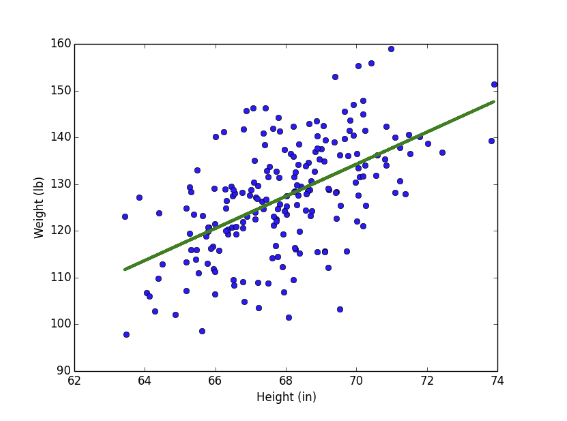

Reading from the line at 73 inches might yield an estimated weight of about 143 pounds. While a line is a rough approximation—real data include noise and outliers—it provides a transparent, mathematically tractable way to explain variation and make predictions when the relationship is approximately linear. In the following sections, we will formalize how to fit such a line, interpret its parameters, and assess how well it generalizes to new data.

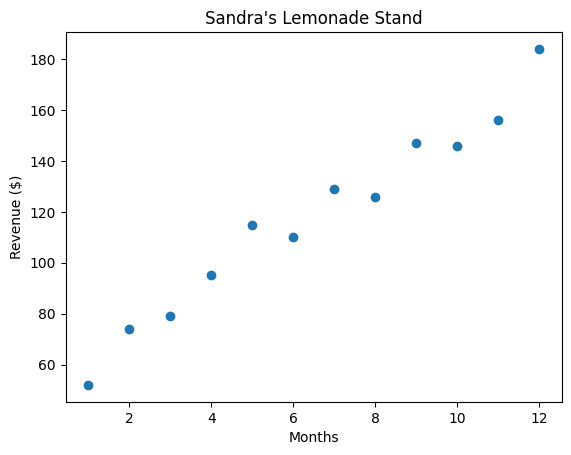

In [2]:
# Run this code
# This shows Sandra’s lemonade stand’s revenue over its first 12 months of being open.
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

plt.plot(months, revenue, "o")

plt.title("Sandra's Lemonade Stand")
plt.xlabel("Months")
plt.ylabel("Revenue ($)")

plt.show()

# From eyeballing the graph, what do you think the revenue in month 13 would be?
month_13 = 200
# Month 13’s revenue is probably going to land somewhere between $190 and $200.

## ## Points and Lines

When trying to make predictions from data, the simplest mathematical tool available is a line. A line allows us to approximate how one variable changes in relation to another, and its form is defined by two parameters: the slope and the intercept. Mathematically, this is expressed as

$$
y = mx + b
$$

where $m$ is the slope and $b$ is the intercept. The slope describes the steepness of the line—how much $y$ changes for every unit change in $x$. The intercept describes where the line crosses the vertical axis, indicating the value of $y$ when $x = 0$.

In the context of linear regression, fitting a line to data means choosing the values of $m$ and $b$ that best capture the relationship between the observed data points. The notion of “best” requires a precise definition, which we will develop in the following lessons. For now, it is enough to understand that the line provides a general rule for prediction, extending beyond the observed points to estimate future or missing values.


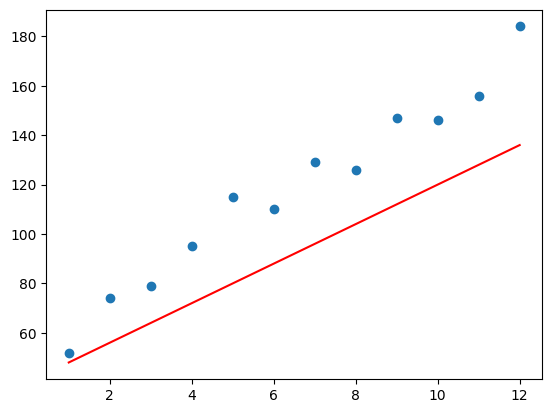

In [4]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# We have provided a slope, m, and an intercept, b, that seems to describe the revenue data you have been given.
# Create a new list, y, that has every element in months, multiplied by m and added to b.
# A list comprehension is probably the easiest way to do this!
m = 8  # slope
b = 40  # intercept
y = [(month * m) + b for month in months]

# Plot the y values against months as a line on top of the scatterplot
plt.plot(months, y, color="red")
plt.plot(months, revenue, "o")

plt.show()

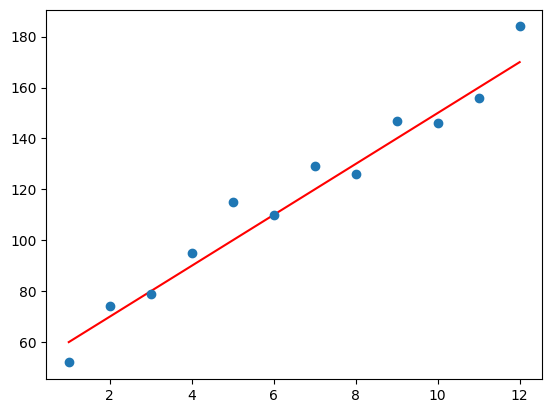

In [6]:
# Change m and b to the values that you think match the data the best.
# To make the line steeper, increase the m value.
# To move the line up, increase the b value.
m = 10  # slope
b = 50  # intercept
y = [(month * m) + b for month in months]

# Plot the new y values against months as a line on top of the scatterplot
plt.plot(months, y, color="red")
plt.plot(months, revenue, "o")

plt.show()

## ## Linear Regression: Loss

To determine which line best fits a set of data points, we need a way to measure how well the line represents the data. This measurement is called *loss*. For each observed point, we compare the true value with the predicted value given by the line, and the difference between them tells us how far off our prediction is.

Instead of simply taking the distance, we use the squared distance. Squaring has two advantages: it ensures that points above and below the line both count as positive contributions to the error, and it gives more weight to larger deviations, which emphasizes poor predictions.
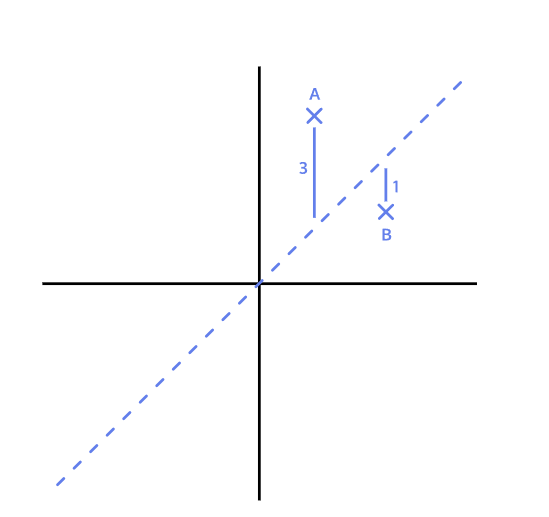

Consider two example points. If point A lies three units away from the line, its contribution to loss is $3^2 = 9$. If point B lies one unit away, its contribution is $1^2 = 1$. Adding them together, the total loss for this line is 10. A different line that produces a smaller total loss would therefore be considered a better fit to the data.

The concept of loss is central to linear regression: the goal is to find the slope and intercept that minimize this total squared error across all data points.


In [7]:
x = [1, 2, 3]
y = [5, 1, 3]

# We have three points, (1, 5), (2, 1), and (3, 3). We are trying to find a line that produces lowest loss.
# y = x
m1 = 1
b1 = 0

# y = 0.5x + 1
m2 = 0.5
b2 = 1

# Find the y-values that the line with weights m1 and b1 would predict for the x-values given.
y_predicted1 = [(v * m1) + b1 for v in x]

# Find the y values that the line with weights m2 and b2 would predict for the x-values given.
y_predicted2 = [(v * m2) + b2 for v in x]

# Create a variable called total_loss1 and set it equal to zero.
# Then, find the sum of the squared distance between the actual y-values of the points and the y_predicted1 values.
total_loss1 = 0
for i in range(len(y_predicted1)):
  total_loss1 += (y[i] - y_predicted1[i]) ** 2

# Create a variable called total_loss2 and set it equal to zero.
# Find the sum of the squared distance between the actual y-values of the points and the y_predicted2 values.
total_loss2 = 0
for i in range(len(y_predicted2)):
  total_loss2 += (y[i] - y_predicted2[i]) ** 2

# Print out total_loss1 and total_loss2. Out of these two lines, which would you use to model the points?
print(total_loss1)
print(total_loss2)

17
13.5


✅📉 Conclusion  

The best fit is represented by the **second line**, because it has the **lower loss**.

## Minimizing Loss with Gradient Descent

The goal of a linear regression model is to find the slope and intercept pair that minimizes loss on average across all of the data. But how to do it?
- Do you first get the slope to where it produces lowest loss, and then move the intercept to where it produces lowest loss?
- Do you create a rough idea in your mind where the line should be first, and then enter the parameters to match that image?

Gradient descent is the process used to minimize loss in linear regression.

* The idea: adjust each parameter (slope *m*, intercept *b*) step by step, always moving in the direction that reduces loss.
* Analogy: like walking downhill until you reach the lowest point.
* **Gradient** = slope of the loss curve at the current point.

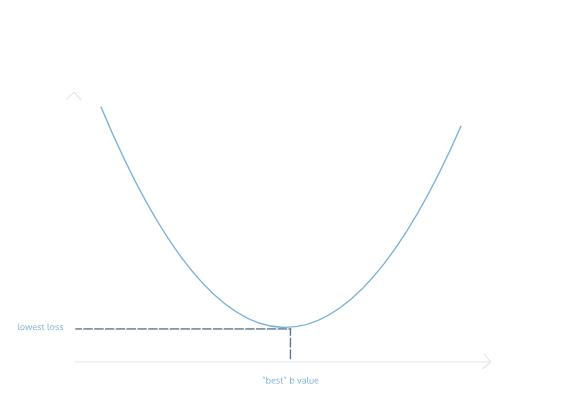

Example:

* Suppose our intercept guess is 10.
* At this point, the slope is downward, so **increasing** the intercept lowers the loss.
* We keep following this direction until no further reduction happens.

**Gradient formula for intercept (*b*):**

$$
\frac{\partial L}{\partial b} = -\frac{2}{N} \sum_{i=1}^{N} \Big( y_i - (m x_i + b) \Big)
$$

Where:

* *N* = number of data points
* *m* = current slope guess
* *b* = current intercept guess

Steps:

1. For each point, compute the error: $y_i - (m x_i + b)$.
2. Sum all errors.
3. Multiply by $-2/N$ to get the gradient.

This gradient tells us how to update *b* in order to decrease loss.


Explanation on Gradient Descent step-by-step

https://www.youtube.com/watch?v=sDv4f4s2SB8&t=85s

In [10]:
# Define a function called get_gradient_at_b() that takes in a set of x values, x, 
# a set of y values, y, a slope m, and an intercept value b.
def get_gradient_at_b(x, y, m, b):
    # Step 1: create a variable to accumulate the sum of (y - (m*x + b))
    diff = 0
    
    # Step 2: loop through all data points and add each difference to diff
    for i in range(len(y)):
        diff += y[i] - ((m * x[i]) + b)
    
    # Step 3: compute the gradient with respect to b using -2/N * diff
    b_gradient = (-2 / len(y)) * diff
    
    # Step 4: return the gradient
    return b_gradient

x = [1, 2, 3]
y = [5, 1, 3]

# We have three points, (1, 5), (2, 1), and (3, 3). We are trying to find a line that produces lowest loss.
# y = x
m1 = 1
b1 = 0

# y = 0.5x + 1
m2 = 0.5
b2 = 1
print(get_gradient_at_b(x, y, m, b))

134.0


## Gradient descent also works for the slope *m*. The gradient tells us how the loss changes as we adjust the slope of the line.

**Formula for the slope gradient (*m*):**

$$
\frac{\partial L}{\partial m} = -\frac{2}{N} \sum_{i=1}^{N} x_i \Big( y_i - (m x_i + b) \Big)
$$

Where:

* *N* = number of points
* *m* = current slope guess
* *b* = current intercept guess

**Steps to calculate the slope gradient:**

1. For each data point, compute:
   $x_i \cdot \big(y_i - (m x_i + b)\big)$
2. Sum all these values across the dataset.
3. Multiply the total by $-2/N$.

Once both the **slope gradient** and the **intercept gradient** are available, we can update *m* and *b* simultaneously, following their respective gradients downward until reaching the lowest loss. This gives the best-fit line.


In [12]:
def get_gradient_at_m(x, y, m, b):
    # Step 1: create a variable to accumulate the sum of x * (y - (m*x + b))
    diff = 0
    N = len(x)

    # Step 2: loop through all data points and add each term to diff
    for i in range(N):
        y_val = y[i]
        x_val = x[i]
        diff += x_val * (y_val - ((m * x_val) + b))

    # Step 3: compute the gradient with respect to m using -2/N * diff
    m_gradient = (-2 / N) * diff

    # Step 4: return the gradient
    return m_gradient

x = [1, 2, 3]
y = [5, 1, 3]

# We have three points, (1, 5), (2, 1), and (3, 3). We are trying to find a line that produces lowest loss.
# y = x
m1 = 1
b1 = 0

# y = 0.5x + 1
m2 = 0.5
b2 = 1
print(get_gradient_at_m(x, y, m, b))

282.66666666666663


## Put it Together
15 min
Now that we know how to calculate the gradient, we want to take a “step” in that direction. However, it’s important to think about whether that step is too big or too small. We don’t want to overshoot the minimum error!

We can scale the size of the step by multiplying the gradient by a learning rate.

To find a new b value, we would say:

new_b = current_b - (learning_rate * b_gradient)

where current_b is our guess for what the b value is, b_gradient is the gradient of the loss curve at our current guess, and learning_rate is proportional to the size of the step we want to take.

In a few exercises, we’ll talk about the implications of a large or small learning rate, but for now, let’s use a fairly small value.

In [16]:
def get_gradient_at_b(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        diff += (y[i] - ((m * x[i]) + b))
    b_gradient = -(2 / N) * diff
    return b_gradient


def get_gradient_at_m(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        diff += x[i] * (y[i] - ((m * x[i]) + b))
    m_gradient = -(2 / N) * diff
    return m_gradient


def step_gradient(x, y, b_current, m_current, learning_rate=0.01):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return b, m


def compute_loss(x, y, b, m):
    total_loss = 0
    for i in range(len(x)):
        total_loss += (y[i] - (m * x[i] + b)) ** 2
    return total_loss / len(x)


# Data
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# Initial guesses
b = 0
m = 0

# Compute original loss
original_loss = compute_loss(months, revenue, b, m)
print("Original values -> b:", b, "m:", m, "loss:", original_loss)

# One step of gradient descent
b, m = step_gradient(months, revenue, b, m)

# Compute new loss
new_loss = compute_loss(months, revenue, b, m)
print("New values -> b:", b, "m:", m, "loss:", new_loss)


Original values -> b: 0 m: 0 loss: 15200.416666666666
New values -> b: 2.355 m: 17.78333333333333 loss: 701.1453212962957


📉 Loss Reduction in Two Steps of Gradient Descent

We started with the initial guesses `b = 0` and `m = 0`.  
- At this point, the **original loss** was very high because the line did not fit the data at all.  

After the **first step** of gradient descent:  
- Both `b` and `m` were updated using the computed gradients.  
- The **loss decreased**, showing that our line moved closer to the data points.  

After the **second step**:  
- Parameters `b` and `m` were adjusted again.  
- The **loss was reduced even further**, confirming that gradient descent is successfully pushing the model toward a better fit.  

✅ Each step of gradient descent moves the line in the direction that minimizes the error, and we can see this process in action by observing how the loss becomes smaller after every update.


## Convergence and Learning Rate
Convergence means reaching the point where updating the parameters *m* and *b* no longer reduces the loss in a meaningful way.

* As gradient descent runs, the loss decreases step by step.
* At some point, changes in *m* and *b* produce little to no change in loss.
* That point is called **convergence**.

In practice, convergence is used as a stopping criterion:

* Stop if the loss stops decreasing after several iterations.
* Or stop if the change in loss is smaller than a chosen threshold.

Ideally, convergence happens at the values of *m* and *b* that give the best fit line. But how do we define how many steps to run for convergence? With the Learning Rate!

In order to train a linear regression model using gradient descent, we need a rule for updating the parameters $m$ and $b$. After computing the gradients, the update step determines how far we move along the loss curve. This is controlled by a parameter known as the *learning rate*.

A small learning rate means that the steps we take are very tiny. While this ensures stability, it also means that convergence toward the minimum of the loss function can take a very long time, sometimes longer than the resources available for training. On the other hand, a large learning rate makes the steps very big, which can cause the algorithm to overshoot the minimum and possibly never converge at all.

The challenge, then, is to select a learning rate that balances efficiency with stability. It does not have to be the perfect value, but it should be large enough to allow for convergence in a reasonable number of iterations and small enough to prevent divergence. In practice, finding such a rate often involves experimentation and adjustment until the training behaves as expected.

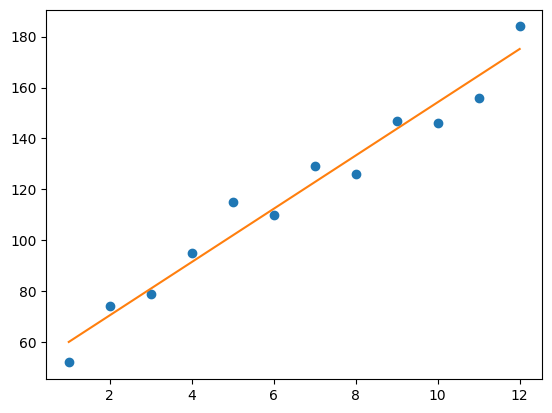

In [18]:
def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

# Update your step_gradient() function to take in the parameter learning_rate 
# and replace the 0.01s in the calculations of b_gradient and m_gradient with learning_rate.
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]
  
# Create a function called gradient_descent() that takes in x, y, learning_rate, and num_iterations.
# In the function, create variables b and m and set them both to zero for our initial guess.
# Create a loop that runs num_iterations times, updating b and m each step with step_gradient().
def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0
  m = 0
  for n in range(num_iterations):
    b_new, m_new = step_gradient(b, m, x, y, learning_rate)
    b = b_new
    m = m_new
  return [b, m]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)

# Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()


## Use Your Functions on Real Data

After constructing a way to find the “best” b and m values using gradient descent! Let’s try this on the set of baseball players’ heights and weights that we saw at the beginning of the lesson.

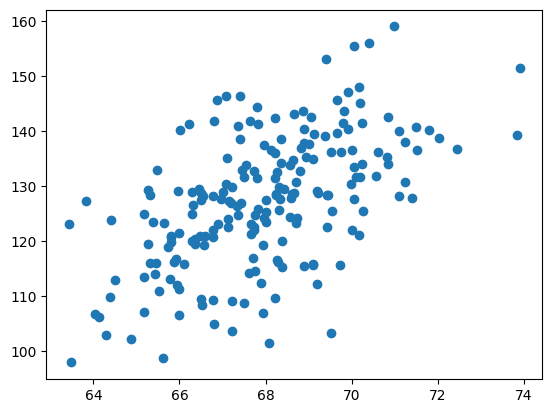

In [22]:
import matplotlib.pyplot as plt

df = pd.read_csv("data_folder/heights.csv")

X = df["height"]
y = df["weight"]

# Run the code in script.py. This is a scatterplot of weight vs height.
plt.plot(X, y, 'o')
plt.show()

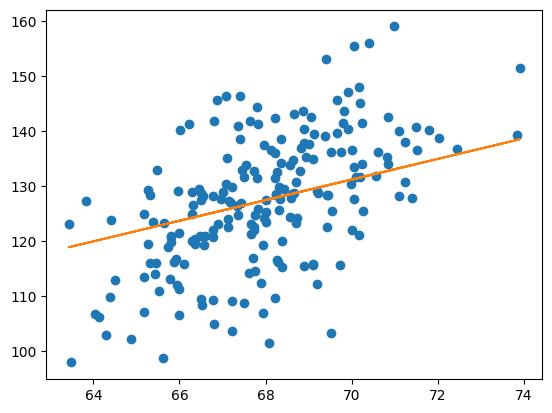

In [23]:
# Call gradient_descent() with X, y, num_iterations of 1000, and learning_rate of 0.0001.
# Store the result in variables called b and m.
b, m = gradient_descent(X, y, 0.0001, 1000)

# Create a list called y_predictions. 
# Set it to be every element of X multiplied by m and added to b.
y_predictions = [(x * m) + b for x in X]

# Plot X vs y_predictions on the same plot as the scatterplot.
plt.plot(X, y, 'o')
plt.plot(X, y_predictions)
plt.show()

## Linear Regression with Scikit-Learn

Having implemented linear regression from first principles, we can now rely on a mature library to handle the same task efficiently and consistently: scikit-learn. Its `LinearRegression` estimator encapsulates the full workflow—model creation, parameter estimation, and prediction—behind a clear, minimal interface. The typical pattern is: instantiate the estimator, call `.fit(X, y)` to estimate parameters from data, then use `.predict(X_new)` to generate predictions for new inputs. After fitting, the learned slope(s) are exposed via `coef_` and the intercept via `intercept_`, which mirrors the $y = mx + b$ form discussed earlier. Unlike our manual gradient descent loop, scikit-learn takes care of the optimization details internally, so we do not set a learning rate or iteration count; the library chooses a numerically stable procedure under the hood. This allows us to focus on data preparation, model evaluation, and interpretability—using the coefficients to quantify how inputs influence the target, inspecting residuals to check assumptions, and integrating the model into broader pipelines for validation and deployment.


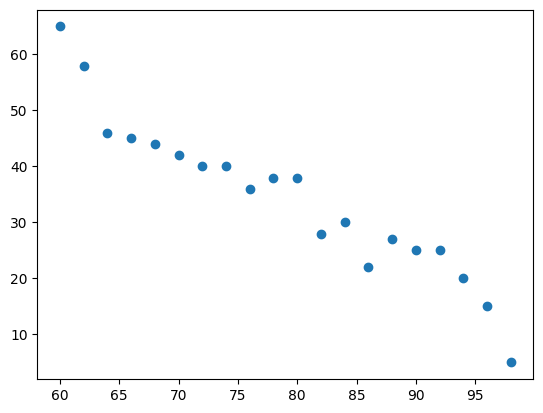

In [26]:
from sklearn.linear_model import LinearRegression

# We have imported a dataset of soup sales data vs temperature.
# Run the code to see the scatterplot. Can you envision the line that would fit this data?
temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

plt.plot(temperature, sales, 'o')
plt.show()

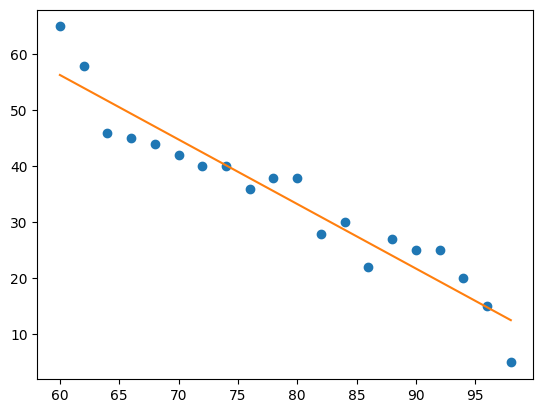

In [28]:
# Create an sklearn linear regression model and call it line_fitter.
line_fitter = LinearRegression()

# Fit the line_fitter object to temperature and sales.
line_fitter.fit(temperature, sales)

# Create a list called sales_predict that is the predicted sales values that line_fitter would generate from the temperature list.
sales_predict = line_fitter.predict(temperature)

# Plot sales_predict against temperature as a line, on the same plot as the scatterplot.
plt.plot(temperature, sales, 'o')
plt.plot(temperature, sales_predict)

plt.show()

## Example on real data


In [32]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

y = housing.target
print(X.shape, y.shape)

(20640, 8) (20640,)
(20640, 8) (20640, 1)


In [47]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)
#print(df.head())
print(df.columns)
X = df[['MedInc']]

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


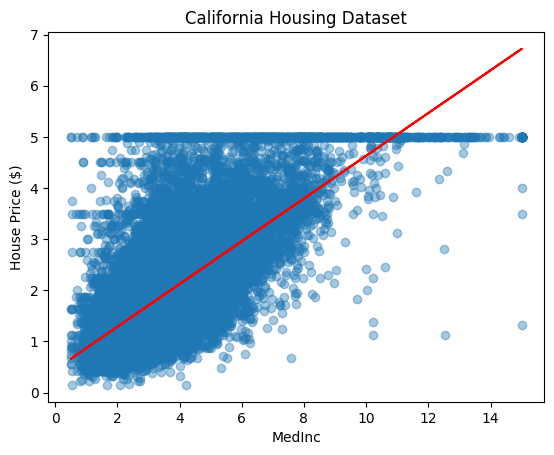

In [49]:
# Can we do linear regression on this?
line_fitter = LinearRegression()

line_fitter.fit(X, y)
y_pred = line_fitter.predict(X)



plt.scatter(X, y, alpha=0.4)
plt.plot(X, y_pred, color = "red")
# Plot line here:

plt.title("California Housing Dataset")
plt.xlabel("MedInc")
plt.ylabel("House Price ($)")
plt.show()

The more someone has income, the more they spent on the house